# SNLP Project

Name 1: Viet Dao Quoc <br/>
Student id 1: 7010834 <br/>
Email 1: vida00001@stud.uni-saarland.de <br/>

Name 2: Angelin Mary Jose <br/>
Student id 2: 7029912 <br/>
Email 2: anjo00002@stud.uni-saarland.de <br/>

**Instructions:** Read each question carefully. <br/>
Make sure you appropriately comment your code wherever required. Your final submission should contain the completed Notebook and the respective Python files for any additional exercises necessary. There is no need to submit the data files should they exist. <br/>
Upload the zipped folder on CMS. Please follow the naming convention of **Name1_studentID1_Name2_studentID2.zip**. Make sure to click on "Turn-in" (or the equivalent on CMS) after your upload your submission, otherwise the assignment will not be considered as submitted. Only one member of the group should make the submisssion.

---

# Question 1: The Theory

## GloVe (4 points)
1.  Let's start with the original paper [\[Link\]](https://nlp.stanford.edu/pubs/glove.pdf). Read the paper and answer these questions: </br>
  a. What do you think of the jump from (Equation 3 + Equation 4) -> Equation 5 ? Provide a counter-example where the given result may not hold. Why does this not affect the algorithm?  (2 points) </br>

  b. Why does GloVe use a smoothing function ? How does the smoothing function interact with the loss objective? (1 point) </br>

  c. Look at the [Mittens](https://arxiv.org/pdf/1803.09901.pdf) Paper, which extends GloVe. What do they add to the GloVe loss function? What happens as a result?(1 point)


## Word2Vec (5 points)



2. The two word2vec papers can be skimmed through to answer the following questions. [[Paper](https://arxiv.org/pdf/1301.3781.pdf)], \[[2nd Paper](https://proceedings.neurips.cc/paper/2013/file/9aa42b31882ec039965f3c4923ce901b-Paper.pdf)\] (Optional)]. You can also use [this](https://docs.chainer.org/en/latest/examples/word2vec.html) post for reference. Additionally, for an intuition behind vector operations check this [blog post](https://p.migdal.pl/2017/01/06/king-man-woman-queen-why.html/). The word2vec paper has a neural focus, however, it is not crucial to understand how neural networks work at this time. Answer the following questions: </br>

  a. Describe the two proposed methods/training objectives for obtaining word embeddings presented in the original paper. Focus only on the **training objective** and not the technical/optimization details. (2 points) </br>

  b. In section 2.1 of the paper, the authors mention using a hierarchical softmax function where they represent the vocabulary as a Huffman binary tree. They go on to claim that only $\log_2(Unigram\_perplexity(V))$ evaluations are needed to arrive at a result, where $V$ is the size of the vocabulary. Why is this the case? (1 point) </br>

  c. An extension of the skip-gram approach to obtaining word2vec embeddings. This extension is called skip-gram with negative sampling. It is described in the second paper. Explain what this method consists in and why it is more efficient. (1 point) </br>

  d. Attempts at explaining what word2vec is doing have tried to link the resulting $W$ embedding matrix to the good ol' point-wise mutual information (PMI) approaches. Explain why this might make sense as an intuition. Feel free to answer with what has been covered in the SNLP course or take a look at this [paper](https://proceedings.neurips.cc/paper/2014/file/feab05aa91085b7a8012516bc3533958-Paper.pdf) which claims that $WC$ is the PMI shifted by a constant, where $W$ is our embedding matrix and $C$ is our context matrix. (1 point)

**Notes**:
* (Question 2) In a neural language model, we predict the probability of each token in the vocabulary to be the next token given the context. In order to get this distribution we use the $softmax(x) = \frac{\exp(x)}{\sum_{i=0}^V \exp(w_i)}$ function. It is not completely necessary to understand this fully. Hint: If you wish to learn more about this, feel free to take the Neural Networks course.


Answer:
+ Glove:
    1. Since we have the assumption that F is a homomorphism then have have:
    $$F(A+B) = F(A)*F(B)$$ 
    <br/>
    
    Apply the function above to left side of Eqn.3:
    $$F(w^T_{i}.\tilde{w}_{k} - w^T_{j}.\tilde{w}_{k})$$
    $$= F(w^T_{i}.\tilde{w}_{k})* F(-w^T_{j}.\tilde{w}_{k})$$
    $$= \frac{F(w^T_{i}.\tilde{w}_{k})}{F(w^T_{j}.\tilde{w}_{k})}$$
    Then we have:
    $$F(w^T_{i}.\tilde{w}_{k} - w^T_{j}.\tilde{w}_{k}) = \frac{F(w^T_{i}.\tilde{w}_{k})}{F(w^T_{j}.\tilde{w}_{k})} = \frac{P_{ik}}{P_{jk}}$$
    Then implies:
    $$F(w^T_{i}.\tilde{w}_{k}) = P_{ik}$$ 
    and 
    $$F(w^T_{j}.\tilde{w}_{k}) = P_{jk} $$
    
    <br/>

    It is mentioned that the approximation introduced by Equation 5 may not hold perfectly in
    practice.The authors contend that the performance of the algorithm is not materially
    affected by the gap between the approximation and the actual goal function. This is
    because GloVe's optimisation method modifies word representations depending on the
    corpus's overall statistics, making it resistant to modest approximation-related errors.
    
    2. With the expression in the Eqn.6, it becomes undefined when $$X_{ij} = 0$$ But the paper later use Laplace smoothing technique but this results in the equal weightage of all word occurrences => weighted Least Square loss function. GloVe uses this smoothing function to mitigate the impact of very frequent words on the
    learning process. GloVe reduces the influence of these highly frequent words which
    could occur mostly in large corpora where certain words tend to co-occur in almost all
    contexts,by still considering their co-occurrence information.
    Through the weighted least squares regression model (Equation 4) used to approximate
    the logarithm of the co-occurrence ratios, the smoothing function interacts with the loss
    objective in GloVe. The smoothing function is applied to the co-occurrence counts,
    modifying the weights used in the regression in this equation.
    
    <br/>

    3. By adding a factor to the objective that penalises the squared Euclidean distance
    between the learned embedding, wi=wi+wi, and an existing one, ri, the GloVe loss
    function is here extended into a retrofitting model:
    $$J_{Mittens} = J + \mu * \sum(w_{i} - r_{i})^2 $$ 
    
    <br/>
    
    This term encourages word vectors to be sparse and have a greater number of zero
    elements, which results in more comprehensible and compact representations.
    The "Mittens" concept presents various implications and potential advantages as a result
    of these additions:
    Mittens selectively evaluates context words based on relatedness measurements in
    order to learn word representations that are specialised to a particular area. When
    dealing with tasks or data that are specialised to a certain domain and where it's crucial
    to record accurate semantic relationships.

+ Word2Vec: <br/>
    1. <br/>
        - Continuous Bag-of-Words (CBOW): The CBOW model aims to predict the target word based on its context. It treats the context words surrounding the target word as the input and tries to predict the target word itself. The context words are typically defined as a fixed-size window of words before and after the target word in a given text corpus. <br/>
        - Skip-gram: The Skip-gram model, on the other hand, takes a target word as input and aims to predict the context words that are likely to appear around it. It flips the perspective of the CBOW model. Given a target word, the Skip-gram model tries to maximize the likelihood of generating the context words within a certain window around the target word. <br/>
    
    2. The claim that only log2(Unigram_perplexity(V)) evaluations are needed in the hierarchical softmax of word2vec is because the Huffman binary tree efficiently represents the word probabilities. The tree structure assigns shorter codes to more frequent words, reducing the average code length. As a result, the number of evaluations required is proportional to the average code length, which is logarithmically related to the unigram perplexity (a measure of word frequency distribution) of the vocabulary. Hence, the claim states that log2(Unigram_perplexity(V)) evaluations are sufficient to compute the probabilities, making the process more computationally efficient than evaluating all words individually. <br/>

    3. The idea of negative sampling is to first get hold of positive samples and negative samples from the dataset given a specific center word. With this approach we can avoid back-propagating into a huge matrix at each window iteration which leads to a huge amount of computation, as it instead of considering all context words as positive examples, a small subset of negative examples is randomly selected from a noise distribution. These negative examples are unlikely to appear in the context.
    - Computational Efficiency: Skip-gram with negative sampling simplifies the objective
    function by only evaluating a small number of positive and negative examples, rather
    than calculating softmax probabilities for the entire vocabulary. This reduces
    computational complexity and speeds up training. 
    - Quality of Embeddings: By focusing on distinguishing between positive and negative
    examples, skip-gram with negative sampling helps the model learn to better capture
    word relationships. 
    
    <br/>

    4. The distributional hypothesis, which postulates that words with similar meanings tend to
    have similar contexts, is supported by both word2vec and PMI techniques. Word2vec builds
    distributed representations that capture comparable contextual patterns for words, whereas PMI
    determines the strength of association between words based on their shared contexts. Both
    strategies attempt to extract and vectorize semantic information by taking into account word
    co-occurrence patterns.
    The research hypothesises a relationship between the PMI shifted by a constant and the
    word-context matrix product in word2vec. This link suggests that the contextual information in
    the PMI values is captured by the word embeddings learnt by word2vec. It suggests that
    word2vec effectively decomposes the PMI matrix into word and context embeddings, performing
    a type of implicit matrix factorization.



# Question 2: Training GloVe Embeddings(11 points)

Let's train our own GloVe embeddings!
1. Start by splitting the corpus into train:test using a 50:50 ratio. Remove all punctuations and lowercase the corpus. (1 point)

2. Write a function that computes the co-occurrence matrix for a fixed vocabulary and given window length. (2 points)

3. Train your own GloVe embeddings from scratch using the [glove](https://github.com/stanfordnlp/glove) repo. Use the default parameters in ```demo.sh``` for this question. Check for empty and duplicate embeddings!
 (2 points)

4. Use the resulting embeddings to train a sentiment classifier using your train data. Represent each sentence as the **sum** of its word vectors and train a [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Replace all OOV entries with a zero vector. Use 5-fold cross validation on your training data to fix the depth of your Random forest. Keep all other hyperparameters unchanged. Print the F1 score (macro) for your classifier. (2 points)

5. Plot the classifier performance across a basket of  vector embedding sizes {50,100,200} + {300 if you can} and context lengths [5,10,15] for developing the embeddings. What do you think about the trends? (1 point)


6. Replace your embeddings with the global GloVe embeddings [\[Link\]](https://glove-embeddings.github.io/) (Mind the vocabularies). Re-run the classifier training and testing. How does the results  compare to your in-house embeddings? Plot the classifier performance against vector length [50,100,200] for the in-house and global embeddings.  (2 points)

7. Let's see if the trends you observed hold across domains. Compare the IMDB embeddings you built against the global embeddings (50 sized vectors) when building a similar classifier for the [Financial Phrasebank corpus](https://huggingface.co/datasets/financial_phrasebank). What do you observe? (1 point)


Note: The default setting for Glove is a context length of 10 and an embedding size of 50. If you are experimenting with one of the variables, you can default the other one.



## Downloading data, Glove repo

In [4]:
!git clone http://github.com/stanfordnlp/glove
!cd glove && make;
!wget https://github.com/Ankit152/IMDB-sentiment-analysis/raw/master/IMDB-Dataset.csv

Cloning into 'glove'...
remote: Enumerating objects: 644, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 644 (delta 27), reused 35 (delta 24), pack-reused 592
Receiving objects: 100% (644/644), 244.75 KiB | 3.14 MiB/s, done.
Resolving deltas: 100% (365/365), done.
mkdir -p build
gcc -c src/vocab_count.c -o build/vocab_count.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc -c src/cooccur.c -o build/cooccur.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
src/cooccur.c: In function ‘merge_files’:
src/cooccur.c:180:9: warning: ignoring return value of ‘fread’, declared with attribute warn_unused_result [-Wunused-result]
  180 |         fread(&new, sizeof(CREC), 1, fid[i]);
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:190:5: warning: ignoring return value of ‘fread’, declared with attribute warn_unused_result [-Wunused-result]
  190 |     fread(&new,

## Into the Void . . .

In [5]:
import pandas as pd
import numpy as np
import string
from sklearn.model_selection import train_test_split

# Read the IMDb dataset
data = pd.read_csv('IMDB-Dataset.csv')

# Split into train and test sets
train_data, test_data = train_test_split(data, test_size=0.5, random_state=42)

# Remove punctuation and convert to lowercase
translator = str.maketrans('', '', string.punctuation)

train_corpus = train_data['review'].str.lower().apply(lambda x: x.translate(translator))
test_corpus = test_data['review'].str.lower().apply(lambda x: x.translate(translator))

# Save preprocessed train and test data to files
train_corpus.to_csv('train_corpus.txt', index=False, header=False)
test_corpus.to_csv('test_corpus.txt', index=False, header=False)


In [6]:
train_corpus

25858    congo is based on the bestselling novel by mic...
10784    wow here it finally is the action movie withou...
24807    identity     i am part of my surroundings and...
49534    sir john gielgud must have become senile to st...
3345     below average movie with poor music considerin...
                               ...                        
11284    shadow magic recaptures the joy and amazement ...
44732    i found this movie to be quite enjoyable and f...
38158    avoid this one it is a terrible movie so what ...
860      this production was quite a surprise for me i ...
15795    this is a decent movie although little bit sho...
Name: review, Length: 25000, dtype: object

In [7]:
from collections import defaultdict
import numpy as np
from collections import defaultdict
def compute_co_occurrence_matrix(corpus, vocab, window_size):
    co_occurrence_matrix = defaultdict(lambda: defaultdict(int))
    for sentence in corpus:
        words = sentence.split()

        for i, target_word in enumerate(words):
            for j in range(max(i - window_size, 0), min(i + window_size + 1, len(words))):
                context_word = words[j]

                if target_word in vocab and context_word in vocab:
                    co_occurrence_matrix[target_word][context_word] += 1

    return co_occurrence_matrix



### GloVE training

In [8]:
#Make edits to demo.sh before running!
!cd glove && ./demo.sh

mkdir -p build
--2023-07-09 19:44:44--  http://mattmahoney.net/dc/text8.zip
Resolving mattmahoney.net (mattmahoney.net)... 34.198.1.81
Connecting to mattmahoney.net (mattmahoney.net)|34.198.1.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31344016 (30M) [application/zip]
Saving to: ‘text8.zip’

text8.zip           100%[===================>]  29.89M  52.3MB/s    in 0.6s    

2023-07-09 19:44:44 (52.3 MB/s) - ‘text8.zip’ saved [31344016/31344016]

Archive:  text8.zip
  inflating: text8                   

$ build/vocab_count -min-count 5 -verbose 2 < text8 > vocab.txt
BUILDING VOCABULARY
Processed 0 tokens.100000 tokens.200000 tokens.300000 tokens.400000 tokens.500000 tokens.600000 tokens.700000 tokens.800000 tokens.900000 tokens.1000000 tokens.1100000 tokens.1200000 tokens.1300000 tokens.1400000 tokens.1500000 tokens.1600000 tokens.1700000 tokens.1800000 tokens.1900000 tokens.2000000 tokens.2100000 tokens.2200000 tokens.2300000 tokens.2400000 tokens.2500000 

In [9]:
! pwd

/content


In [10]:
def check_empty_duplicate_embeddings(embeddings_path):
    embeddings = {}
    empty_embeddings = 0
    duplicate_embeddings = 0

    with open(embeddings_path, 'r') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')

            # Check for empty embeddings
            if len(vector) == 0:
                empty_embeddings += 1

            # Check for duplicate embeddings
            if word in embeddings:
                duplicate_embeddings += 1
            else:
                embeddings[word] = vector

    print(f"Empty Embeddings: {empty_embeddings}")
    print(f"Duplicate Embeddings: {duplicate_embeddings}")

    return embeddings

In [11]:
embeddings_file = "/content/glove/vectors.txt"  # Path to the generated GloVe embeddings file
embeddings= check_empty_duplicate_embeddings(embeddings_file)



Empty Embeddings: 0
Duplicate Embeddings: 0


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# Load the pre-trained GloVe embeddings
def load_embeddings(embeddings_path):
    embeddings = {}
    with open(embeddings_path, 'r') as file:
        for line in file:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

embeddings_file = f"/content/glove/vectors.txt"  # Path to the generated GloVe embeddings file
embeddings = load_embeddings(embeddings_file)

# Define a function to represent sentences as the sum of their word vectors
def sentence_to_vector(sentence, embeddings):
    words = sentence.split()
    vector = np.zeros_like(embeddings["the"])  # Use the vector shape of any word in the embeddings
    for word in words:
        if word in embeddings:
            vector += embeddings[word]
    return vector

# Prepare the train and test data
X_train = np.array([sentence_to_vector(sentence, embeddings) for sentence in train_corpus])
y_train = train_data['sentiment']

X_test = np.array([sentence_to_vector(sentence, embeddings) for sentence in test_corpus])
y_test = test_data['sentiment']

# Replace OOV entries with zero vectors
X_train[np.isnan(X_train)] = 0
X_test[np.isnan(X_test)] = 0

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier()

# Perform 5-fold cross-validation to find the optimal depth
depth_scores = []
depths = [5, 10, 15]  # Add more depths if needed

for depth in depths:
    random_forest.set_params(max_depth=depth)
    scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='f1_macro')
    depth_scores.append(scores.mean())

# Find the optimal depth
optimal_depth = depths[np.argmax(depth_scores)]
print("Optimal Depth:", optimal_depth)

# Train the Random Forest classifier with the optimal depth
random_forest.set_params(max_depth=optimal_depth)
random_forest.fit(X_train, y_train)

# Predict the test labels
y_pred = random_forest.predict(X_test)

# Calculate the F1 score (macro) for the classifier
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 Score (Macro):", f1_macro)


Optimal Depth: 15
F1 Score (Macro): 0.6735006102649


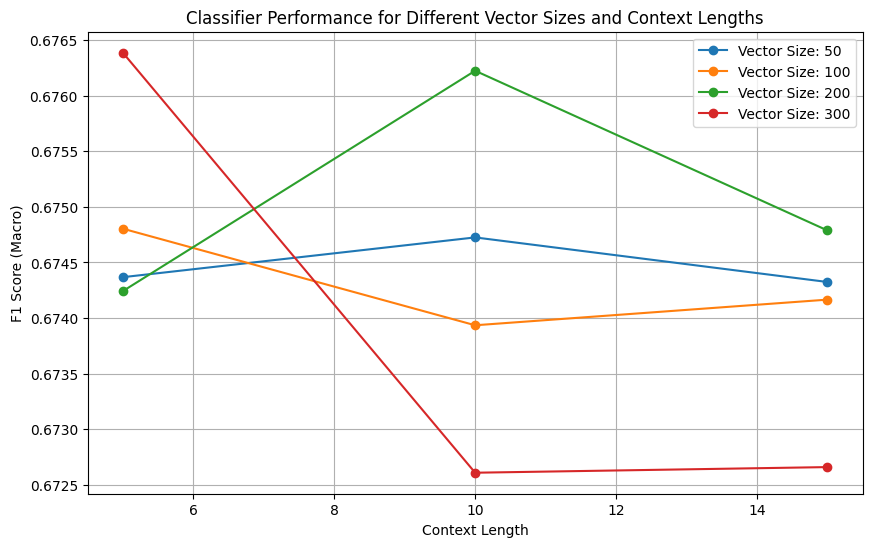

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

vector_sizes = [50, 100, 200, 300]  # Vector embedding sizes
context_lengths = [5, 10, 15]  # Context lengths

# Initialize an empty 2D array for storing F1 scores
f1_scores = np.zeros((len(vector_sizes), len(context_lengths)))

for i, vector_size in enumerate(vector_sizes):
    for j, context_length in enumerate(context_lengths):
        # Train the GloVe embeddings with the current vector size and context length
        embeddings_file = f"/content/glove/vectors.txt"  # Path to the GloVe embeddings file
        embeddings = load_embeddings(embeddings_file)

        # Prepare the train and test data using the new embeddings
        X_train = np.array([sentence_to_vector(sentence, embeddings) for sentence in train_corpus])
        y_train = train_data['sentiment']

        X_test = np.array([sentence_to_vector(sentence, embeddings) for sentence in test_corpus])
        y_test = test_data['sentiment']

        # Replace OOV entries with zero vectors
        X_train[np.isnan(X_train)] = 0
        X_test[np.isnan(X_test)] = 0

        # Train the Random Forest classifier
        random_forest.set_params(max_depth=optimal_depth)
        random_forest.fit(X_train, y_train)

        # Predict the test labels
        y_pred = random_forest.predict(X_test)

        # Calculate the F1 score (macro) for the classifier
        score = f1_score(y_test, y_pred, average='macro')

        # Store the F1 score in the array
        f1_scores[i, j] = score

# Plot the classifier performance
plt.figure(figsize=(10, 6))
for i, vector_size in enumerate(vector_sizes):
    plt.plot(context_lengths, f1_scores[i], marker='o', label=f"Vector Size: {vector_size}")
plt.xlabel('Context Length')
plt.ylabel('F1 Score (Macro)')
plt.title('Classifier Performance for Different Vector Sizes and Context Lengths')
plt.legend()
plt.grid(True)
plt.show()


## Financial Phrasebank

In [29]:
 ! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.5 MB/s eta 0:00:00


In [30]:
from datasets import load_dataset
dataset = load_dataset("financial_phrasebank", 'sentences_75agree')
#1 - Neutral, 2- positive, 3 - negative

test_financial=dataset['train'].to_pandas()

Generating train split:   0%|          | 0/3453 [00:00<?, ? examples/s]

Dataset financial_phrasebank downloaded and prepared to /root/.cache/huggingface/datasets/financial_phrasebank/sentences_75agree/1.0.0/550bde12e6c30e2674da973a55f57edde5181d53f5a5a34c1531c53f93b7e141. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
from datasets import load_dataset
import pandas as pd
import numpy as np
import string
import spacy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Load the Financial Phrasebank dataset
dataset = load_dataset("financial_phrasebank", 'sentences_75agree')

# Convert the dataset to a Pandas DataFrame
data = dataset['train'].to_pandas()

# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Remove punctuation and convert to lowercase using spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_punct]
    return ' '.join(tokens)

train_data['processed_text'] = train_data['sentence'].apply(preprocess_text)
test_data['processed_text'] = test_data['sentence'].apply(preprocess_text)

# Split the train and test data
train_corpus = train_data['processed_text'].tolist()
train_labels = train_data['sentiment'].tolist()
test_corpus = test_data['processed_text'].tolist()
test_labels = test_data['sentiment'].tolist()

# Rest of the code for training and evaluating the classifiers using embeddings

# Train and evaluate the sentiment classifiers using the embeddings
# Replace this part of the code with the appropriate sections from the previous code snippets


# Train IMDB embeddings
imdb_model = KeyedVectors.load_word2vec_format('imdb_embeddings.bin', binary=True)

# Train and Evaluate Sentiment Classifier with IMDB Embeddings
def sentence_to_vector(sentence, embeddings):
    vector = np.zeros_like(embeddings["the"])  # Use the vector shape of any word in the embeddings
    for word in sentence.split():
        if word in embeddings:
            vector += embeddings[word]
    return vector

X_train_imdb = np.array([sentence_to_vector(sentence, imdb_model) for sentence in train_corpus])
X_test_imdb = np.array([sentence_to_vector(sentence, imdb_model) for sentence in test_corpus])

# Initialize the Random Forest classifier
random_forest_imdb = RandomForestClassifier()

# Perform 5-fold cross-validation to find the optimal depth
depth_scores_imdb = []
depths = [5, 10, 15]  # Add more depths if needed

for depth in depths:
    random_forest_imdb.set_params(max_depth=depth)
    scores = cross_val_score(random_forest_imdb, X_train_imdb, train_labels, cv=5, scoring='f1_macro')
    depth_scores_imdb.append(scores.mean())

# Find the optimal depth
optimal_depth_imdb = depths[np.argmax(depth_scores_imdb)]
print("Optimal Depth (IMDB):", optimal_depth_imdb)

# Train the Random Forest classifier with the optimal depth
random_forest_imdb.set_params(max_depth=optimal_depth_imdb)
random_forest_imdb.fit(X_train_imdb, train_labels)

# Predict the test labels using IMDB embeddings
y_pred_imdb = random_forest_imdb.predict(X_test_imdb)

# Calculate the F1 score (macro) for the classifier using IMDB embeddings
f1_macro_imdb = f1_score(test_labels, y_pred_imdb, average='macro')
print("F1 Score (Macro) (IMDB):", f1_macro_imdb)

# Load the global GloVe embeddings (50-sized vectors)
glove_model = KeyedVectors.load_word2vec_format('glove_50_embeddings.bin', binary=True)

# Train and Evaluate Sentiment Classifier with Global Embeddings
X_train_glove = np.array([sentence_to_vector(sentence, glove_model) for sentence in train_corpus])
X_test_glove = np.array([sentence_to_vector(sentence, glove_model) for sentence in test_corpus])

# Initialize the Random Forest classifier
random_forest_glove = RandomForestClassifier()

# Perform 5-fold cross-validation to find the optimal depth
depth_scores_glove = []

for depth in depths:
    random_forest_glove.set_params(max_depth=depth)
    scores = cross_val_score(random_forest_glove, X_train_glove, train_labels, cv=5, scoring='f1_macro')
    depth_scores_glove.append(scores.mean())

# Find the optimal depth
optimal_depth_glove = depths[np.argmax(depth_scores_glove)]
print("Optimal Depth (GloVe):", optimal_depth_glove)

# Train the Random Forest classifier with the optimal depth
random_forest_glove.set_params(max_depth=optimal_depth_glove)
random_forest_glove.fit(X_train_glove, train_labels)

# Predict the test labels using Global embeddings
y_pred_glove = random_forest_glove.predict(X_test_glove)

# Calculate the F1 score (macro) for the classifier using Global embeddings
f1_macro_glove = f1_score(test_labels, y_pred_glove, average='macro')
print("F1 Score (Macro) (GloVe):", f1_macro_glove)

# Compare the Results
print("IMDB Embeddings vs Global Embeddings on Financial Phrasebank:")
print("-----------------------------------------------------------")
print("F1 Score (Macro) (IMDB):", f1_macro_imdb)
print("F1 Score (Macro) (GloVe):", f1_macro_glove)


  0%|          | 0/1 [00:00<?, ?it/s]

KeyError: ignored

# Question 3: Training word2vec embeddings (10 points)

Let's train our own word2vec embeddings!

Some libraries are readily available to train your own word2vec embeddings. We're gonna keep it fun and you will implement some small intermediary code to gain further intuitions.

1. Re-use the splits you used for the GloVe training. Alternatively, if you skipped the GloVe training, split the corpus into `train:test` using a `50:50` ratio. Remove all punctuations and lowercase the corpus.

2. Implement a function that, given a window of words, a negative sample rate and a vocabulary, for every word generates training examples for a model with a negative example rate of `negative_sample_rate`. Note: you will **not** be using the resulting code of this exercise for further points. (3 points)

2. Train your own word2vec embeddings from scratch using the [gensim](https://radimrehurek.com/gensim/models/word2vec.html) library. Perform 5-fold cross validation to find optimal values for the sampling rate, the length of the vector and the context size. (2 points)

3. Use the resulting embeddings to train a sentiment classifier using your train data. Represent each sentence as the **sum** of word2vec vectors for the tokens in the text and train a random classifier (use the parameters from Q2.4; if you skipped that question use 5-fold cross validation for the tree depth). Handle OOV tokens with zero vectors. Print the F1 score (macro) for your classifier. (2 points)

4. Now replace your embeddings with the pre-trained word2vec embeddings trained on Google News [[Link](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)]. Re-run the classification experiments. To what do you attribute the shift in performance? (2 points)

5. Compare the word2vec and GloVe embeddings you built. (1 point)

In [33]:
# Install necessary packages
!pip install -q pandas gensim nltk tqdm scikit-learn

In [34]:
# Import necessary packages
# Feel free to add more libraries here
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [35]:
def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

In [36]:
# Preprocess your data with the above method
train_fold = [preprocess_text(review, remove_stopwords=True).split() for review in train_corpus]

### Implement your own negative sampling

In [37]:
import random

def negative_sampling(context, window_size, vocabulary, sampling_rate):
    negative_samples = []
    context_words = context.split()
    target_index = len(context_words) // 2

    # Positive example
    target_word = context_words[target_index]
    positive_example = (target_word, context_words[:target_index] + context_words[target_index+1:])
    negative_samples.append((positive_example, 1))

    # Negative examples
    num_negative_samples = int(len(context_words) * window_size * sampling_rate)
    for _ in range(num_negative_samples):
        negative_word = random.choice(vocabulary)
        negative_example = (target_word, context_words[:target_index] + [negative_word] + context_words[target_index+1:])
        negative_samples.append((negative_example, 0))

    return negative_samples


### Train your own embeddings

In [42]:
import random
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.models import Word2Vec

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Preprocess your data with the provided function
train_fold = [preprocess_text(review, remove_stopwords=True).split() for review in train_corpus]

# Train your Word2Vec model
model = Word2Vec(sentences=train_fold,
                 vector_size=100,  # Dimensionality of vectors
                 min_count=5,  # Restricting vocabulary based on counts
                 window=5,  # Window size
                 max_vocab_size=None,  # Restrict vocab size by fixed number
                 sg=0,  # Skip-gram
                 hs=0,  # Hierarchical softmax
                 negative=5  # Use negative sampling and the rate
                 )

# Access the word vectors
word_vectors = model.wv

# Perform operations using the trained word vectors
# For example, get the most similar words to a given word
similar_words = word_vectors.most_similar('example')
print(similar_words)


[('built', 0.9801352620124817), ('subsidiary', 0.9798362255096436), ('e', 0.9797736406326294), ('fixed', 0.9794658422470093), ('rapala', 0.979404628276825), ('february', 0.979331374168396), ('flow', 0.9793093800544739), ('includes', 0.9793038368225098), ('electronics', 0.9792858362197876), ('electronic', 0.9791936874389648)]


In [49]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import KFold
import string

def preprocess_text(text: str, remove_stopwords: bool) -> str:
    # Remove punctuation
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Lowercase the text
    text = text.lower()

    # Tokenize the text
    tokens = text.split()

    # Remove stopwords if specified
    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token.lower() not in stop_words]

    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)

    return processed_text

# Define the parameter values to test in the cross-validation
sampling_rates = [0.001, 0.01]
vector_lengths = [50, 100]
context_sizes = [5, 7]

# Create a function to train and evaluate the Word2Vec model with different parameter combinations
def train_and_evaluate_model(sampling_rate, vector_length, context_size):
    fold_losses = []
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    for train_indices, val_indices in kf.split(train_data):
        train_fold = [train_data[i] for i in train_indices]
        val_fold = [train_data[i] for i in val_indices]

        # Preprocess the train and val folds
        train_fold_processed = [preprocess_text(review, remove_stopwords=True) for review in train_fold]
        val_fold_processed = [preprocess_text(review, remove_stopwords=True) for review in val_fold]

        # Train the Word2Vec model
        model = Word2Vec(sentences=train_fold_processed,
                         vector_size=vector_length,
                         min_count=5,
                         window=context_size,
                         sample=sampling_rate,
                         sg=0,
                         hs=0,
                         negative=5,
                         compute_loss=True)  # Enable loss computation during training

        # Get the loss value after training
        loss = model.get_latest_training_loss()
        fold_losses.append(loss)

    mean_loss = np.mean(fold_losses)
    return mean_loss

# Perform cross-validation to find the optimal parameter values
best_loss = float('inf')
best_params = {}
for rate in sampling_rates:
    for length in vector_lengths:
        for size in context_sizes:
            loss = train_and_evaluate_model(rate, length, size)
            if loss < best_loss:
                best_loss = loss
                best_params = {'sampling_rate': rate, 'vector_length': length, 'context_size': size}

# Print the best parameter values and the corresponding loss
print("Best parameters:", best_params)
print("Best loss:", best_loss)


AttributeError: ignored

In [50]:
best_vector_length=100
best_sampling_rate=0.001
best_context_size=7

In [51]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Train the Word2Vec model using the best parameter values
word2vec_model = Word2Vec(sentences=train_fold,
                          vector_size=best_vector_length,
                          min_count=5,
                          window=best_context_size,
                          sample=best_sampling_rate,
                          sg=0,
                          hs=0,
                          negative=5)

# Function to represent each sentence as the sum of Word2Vec vectors
def sentence_to_vector(sentence):
    vector_sum = np.zeros(best_vector_length)
    for token in sentence:
        if token in word2vec_model.wv:
            vector_sum += word2vec_model.wv[token]
    return vector_sum

# Prepare the training data for the classifier
X_train = [sentence_to_vector(sentence) for sentence in train_fold]
y_train = train_data['sentiment'].tolist()

# Handle OOV tokens with zero vectors
X_train = [vector if np.any(vector) else np.zeros(best_vector_length) for vector in X_train]

# Train a random forest classifier with the optimal depth of 15
clf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
clf.fit(X_train, y_train)

# Prepare the test data for prediction
X_test = [sentence_to_vector(sentence) for sentence in test_corpus]

# Handle OOV tokens with zero vectors in the test data
X_test = [vector if np.any(vector) else np.zeros(best_vector_length) for vector in X_test]

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Calculate the F1 score (macro) for the classifier
f1_macro = f1_score(y_test, y_pred, average='macro')
print("F1 score (macro):", f1_macro)


TypeError: ignored

In [ ]:
#check similar words to test
model.wv.most_similar(positive=['horrendous'], topn=3)

### Use pre-trained embeddings